In [11]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
# Load the dataset
df_EFI = pd.read_csv('EFIplus_medit.csv', delimiter=";")
# Remove rows with NaN values
df_EFI=df_EFI.dropna()

# Select the continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

In [13]:
douro_tejo_sites = df_EFI[df_EFI['Catchment_name'].isin(['Douro', 'Tejo'])]

douro_tejo_sites.set_index('Catchment_name', inplace=True)

# Select the quantitative environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_sites.loc[['Douro', 'Tejo'], continuous_vars]
print(X.head())
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

                Altitude  Actual_river_slope  Elevation_mean_catch  \
Catchment_name                                                       
Douro               1179               0.001           1687.103217   
Douro               1038               2.258           1293.238318   
Douro                636               0.263            967.398405   
Douro                890               2.909           1088.329483   
Douro                872               3.530            985.273741   

                prec_ann_catch  temp_ann  temp_jan  temp_jul  
Catchment_name                                                
Douro               810.092422       9.3       1.4      18.4  
Douro               650.030528      10.4       2.2      19.6  
Douro               513.949149      12.6       3.8      21.3  
Douro               553.756064      11.2       2.7      20.5  
Douro               518.863081      11.1       2.6      20.0  


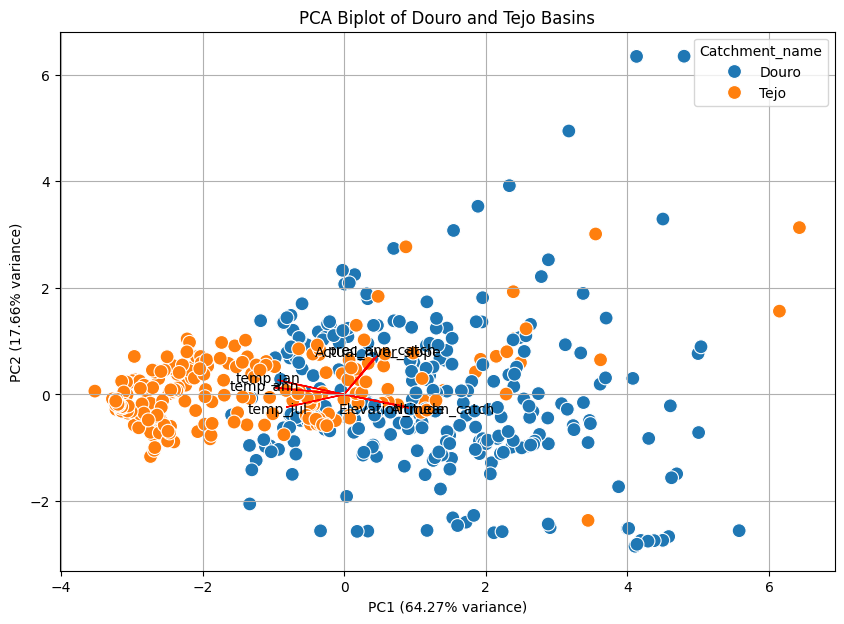

In [16]:
# Run PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Catchment_name'] = douro_tejo_sites.index.values

# Plot the PCA biplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Catchment_name', s=100)

# Add component vectors to the biplot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, var in enumerate(continuous_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=1)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='black', ha='center', va='center')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Biplot of Douro and Tejo Basins')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


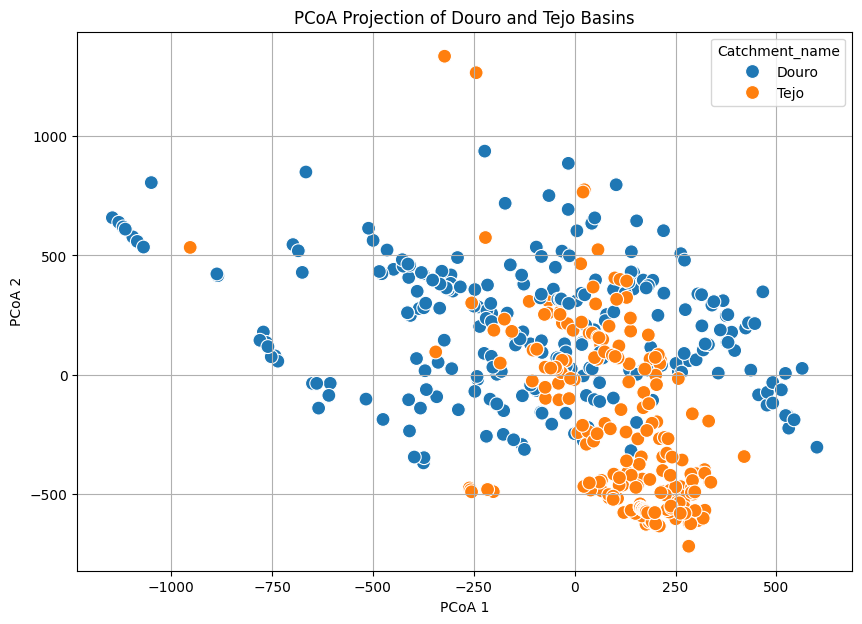

In [15]:
# Compute pairwise distance matrix
distances = pairwise_distances(X, metric='euclidean')

# Perform PCoA
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(distances)

# Create a DataFrame with the coordinates
coords_df = pd.DataFrame(data=coordinates, columns=['Axis1', 'Axis2'])
coords_df['Catchment_name'] = douro_tejo_sites.index.values

# Plot the PCoA projection
plt.figure(figsize=(10, 7))
sns.scatterplot(data=coords_df, x='Axis1', y='Axis2', hue='Catchment_name', s=100)
plt.title('PCoA Projection of Douro and Tejo Basins')
plt.xlabel('PCoA 1')
plt.ylabel('PCoA 2')
plt.grid()
plt.legend(title='Catchment_name')
plt.show()